In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

In [4]:
df= pd.read_csv("TimeSeriesDatasetModified.csv")

In [5]:
df.drop(columns=['bdl_Open','bdl_High','bdl_Low','bdl_Close','bdl_Adj Close','bdl_Volume' ,'zentec_Open','zentec_High','zentec_Low','zentec_Close','zentec_Adj Close','zentec_Volume'],axis=1,inplace= True)

In [6]:
df.head()

,Date,hal_Open,hal_High,hal_Low,hal_Close,hal_Adj Close,hal_Volume
0,02-04-2018,1127.699951,1155.000000,1100.050049,1102.849976,939.665161,463619
1,09-04-2018,1100.500000,1150.000000,1080.099976,1123.050049,956.876221,352724
2,16-04-2018,1125.000000,1164.000000,1118.000000,1125.550049,959.006348,324581
3,23-04-2018,1132.000000,1149.000000,1122.000000,1125.800049,959.219238,137822
4,30-04-2018,1134.400024,1134.400024,1089.199951,1093.550049,931.741211,68802


In [7]:
df['Date'] = pd.to_datetime(df['Date'],format= "%d-%m-%Y")
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.set_index('Date')
df.head()

,hal_Open,hal_High,hal_Low,hal_Close,hal_Adj Close,hal_Volume,Month,Year
Date,,,,,,,,
2018-04-02,1127.699951,1155.000000,1100.050049,1102.849976,939.665161,463619,4,2018
2018-04-09,1100.500000,1150.000000,1080.099976,1123.050049,956.876221,352724,4,2018
2018-04-16,1125.000000,1164.000000,1118.000000,1125.550049,959.006348,324581,4,2018
2018-04-23,1132.000000,1149.000000,1122.000000,1125.800049,959.219238,137822,4,2018
2018-04-30,1134.400024,1134.400024,1089.199951,1093.550049,931.741211,68802,4,2018


In [8]:
df['rolling_mean_hal_Open'] = df['hal_Open'].rolling(window=3).mean()

df['rolling_std_hal_Open'] = df['hal_Open'].rolling(window=3).std()

df['diff_hal_Open'] = df['hal_Open'].diff()

df['ewm_hal_Open'] = df['hal_Open'].ewm(com=0.5).mean()

df['variance_hal_Open'] = df['hal_Open'].rolling(window=3).var()

df['rolling_mean_Volume'] = df['hal_Volume'].rolling(window=3).mean()
df['VSI'] = (df['hal_Volume'] / df['rolling_mean_Volume']) * 100



df['rolling_mean_hal_Close'] = df['hal_Close'].rolling(window=3).mean()

df['rolling_std_hal_Close'] = df['hal_Close'].rolling(window=3).std()

df['diff_hal_Close'] = df['hal_Close'].diff()

df['ewm_hal_Close'] = df['hal_Close'].ewm(com=0.5).mean()

df['variance_hal_Close'] = df['hal_Close'].rolling(window=3).var()





df['rolling_mean_hal_Adj Close'] = df['hal_Adj Close'].rolling(window=3).mean()

df['rolling_std_hal_Adj Close'] = df['hal_Adj Close'].rolling(window=3).std()

df['diff_hal_Adj Close'] = df['hal_Adj Close'].diff()

df['ewm_hal_Adj Close'] = df['hal_Adj Close'].ewm(com=0.5).mean()

df['variance_hal_Adj Close'] = df['hal_Adj Close'].rolling(window=3).var()

In [9]:
df.head()

,hal_Open,hal_High,hal_Low,hal_Close,hal_Adj Close,hal_Volume,Month,Year,rolling_mean_hal_Open,rolling_std_hal_Open,...,rolling_mean_hal_Close,rolling_std_hal_Close,diff_hal_Close,ewm_hal_Close,variance_hal_Close,rolling_mean_hal_Adj Close,rolling_std_hal_Adj Close,diff_hal_Adj Close,ewm_hal_Adj Close,variance_hal_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-02,1127.699951,1155.000000,1100.050049,1102.849976,939.665161,463619,4,2018,NaN,NaN,...,NaN,NaN,NaN,1102.849976,NaN,NaN,NaN,NaN,939.665161,NaN
2018-04-09,1100.500000,1150.000000,1080.099976,1123.050049,956.876221,352724,4,2018,NaN,NaN,...,NaN,NaN,20.200073,1118.000031,NaN,NaN,NaN,17.211060,952.573456,NaN
2018-04-16,1125.000000,1164.000000,1118.000000,1125.550049,959.006348,324581,4,2018,1117.733317,14.985421,...,1117.150025,12.447130,2.500000,1123.226966,154.931044,951.849243,10.605341,2.130127,957.026997,112.473257
2018-04-23,1132.000000,1149.000000,1122.000000,1125.800049,959.219238,137822,4,2018,1119.166667,16.540355,...,1124.800049,1.520691,0.250000,1124.963797,2.312500,958.367269,1.295665,0.212890,958.506760,1.678749
2018-04-30,1134.400024,1134.400024,1089.199951,1093.550049,931.741211,68802,4,2018,1130.466675,4.883997,...,1114.966716,18.547799,-32.250000,1103.934759,344.020833,949.988932,15.803349,-27.478027,940.589326,249.745831


In [10]:
df.dropna(inplace=True)

In [11]:

start_date='02/04/2018'
end_date='07/02/2022'
mask=(df.index >=start_date)&(df.index <=end_date)
dftrain=df.loc[mask]

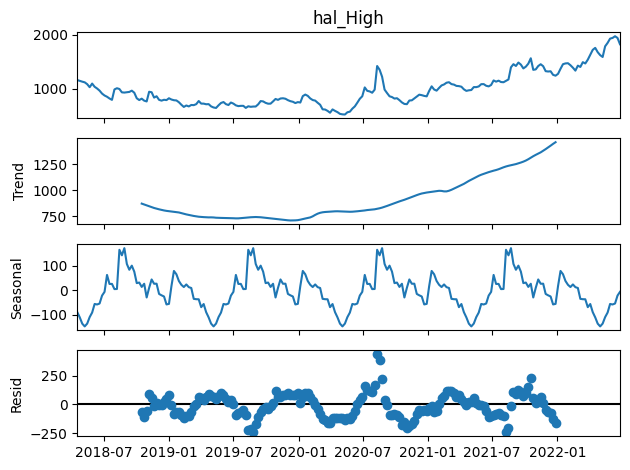

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dftrain['hal_High'].astype(float), model='additive')
result.plot()
plt.show()

In [13]:
start_date='14/02/2022'
end_date='27/01/2023'
mask=(df.index >=start_date)&(df.index <=end_date)
dftest=df.loc[mask]

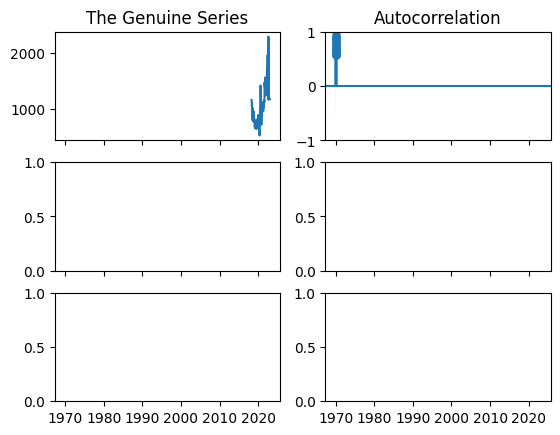

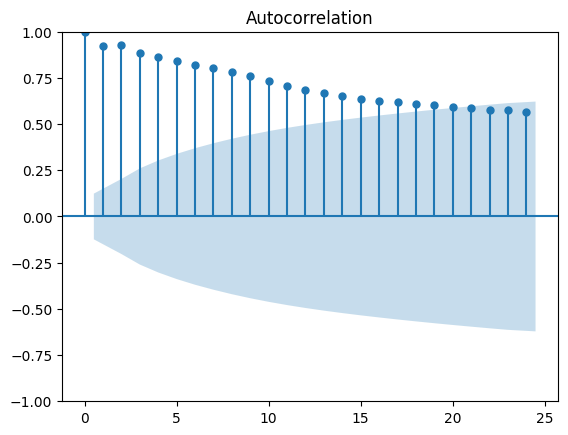

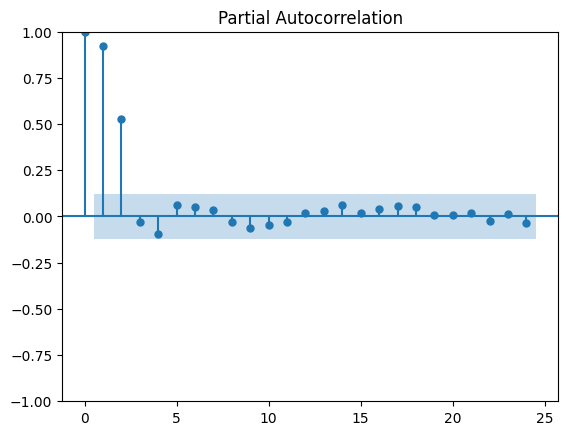

c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

Optimal (p, d, q) values: (1, 1, 0)


c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

In [14]:

fig, axes = plt.subplots(3, 2, sharex = True)
axes[0, 0].plot(df['hal_High'])
axes[0, 0].set_title('The Genuine Series')
plot_acf(df['hal_High'], ax=axes[0,1])
dates = pd.to_datetime(df['hal_High'])
values =df['hal_High']
series = pd.Series(values.values, index=dates)

# Determine the optimal values for p and q using ACF and PACF plots
plot_acf(series)
plt.show()

plot_pacf(series)
plt.show()

# Grid search to find the optimal values for p, d, and q
best_aic = np.inf
best_order = None

for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = ARIMA(series, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic

                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                   continue
print(f"Optimal (p, d, q) values: {best_order}")

In [15]:
dftrain.columns

Index(['hal_Open', 'hal_High', 'hal_Low', 'hal_Close', 'hal_Adj Close',
       'hal_Volume', 'Month', 'Year', 'rolling_mean_hal_Open',
       'rolling_std_hal_Open', 'diff_hal_Open', 'ewm_hal_Open',
       'variance_hal_Open', 'rolling_mean_Volume', 'VSI',
       'rolling_mean_hal_Close', 'rolling_std_hal_Close', 'diff_hal_Close',
       'ewm_hal_Close', 'variance_hal_Close', 'rolling_mean_hal_Adj Close',
       'rolling_std_hal_Adj Close', 'diff_hal_Adj Close', 'ewm_hal_Adj Close',
       'variance_hal_Adj Close'],
      dtype='object')

c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               hal_High   No. Observations:                  220
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -966.004
Date:                Fri, 09 Feb 2024   AIC                           1986.008
Time:                        23:05:17   BIC                           2077.513
Sample:                    04-16-2018   HQIC                          2022.964
                         - 06-27-2022                                         
Covariance Type:                  opg                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3.043e-20        nan        nan        nan         nan         nan
hal_Open                       2.8738      1.974      1.456      0.145      -0.995 

c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


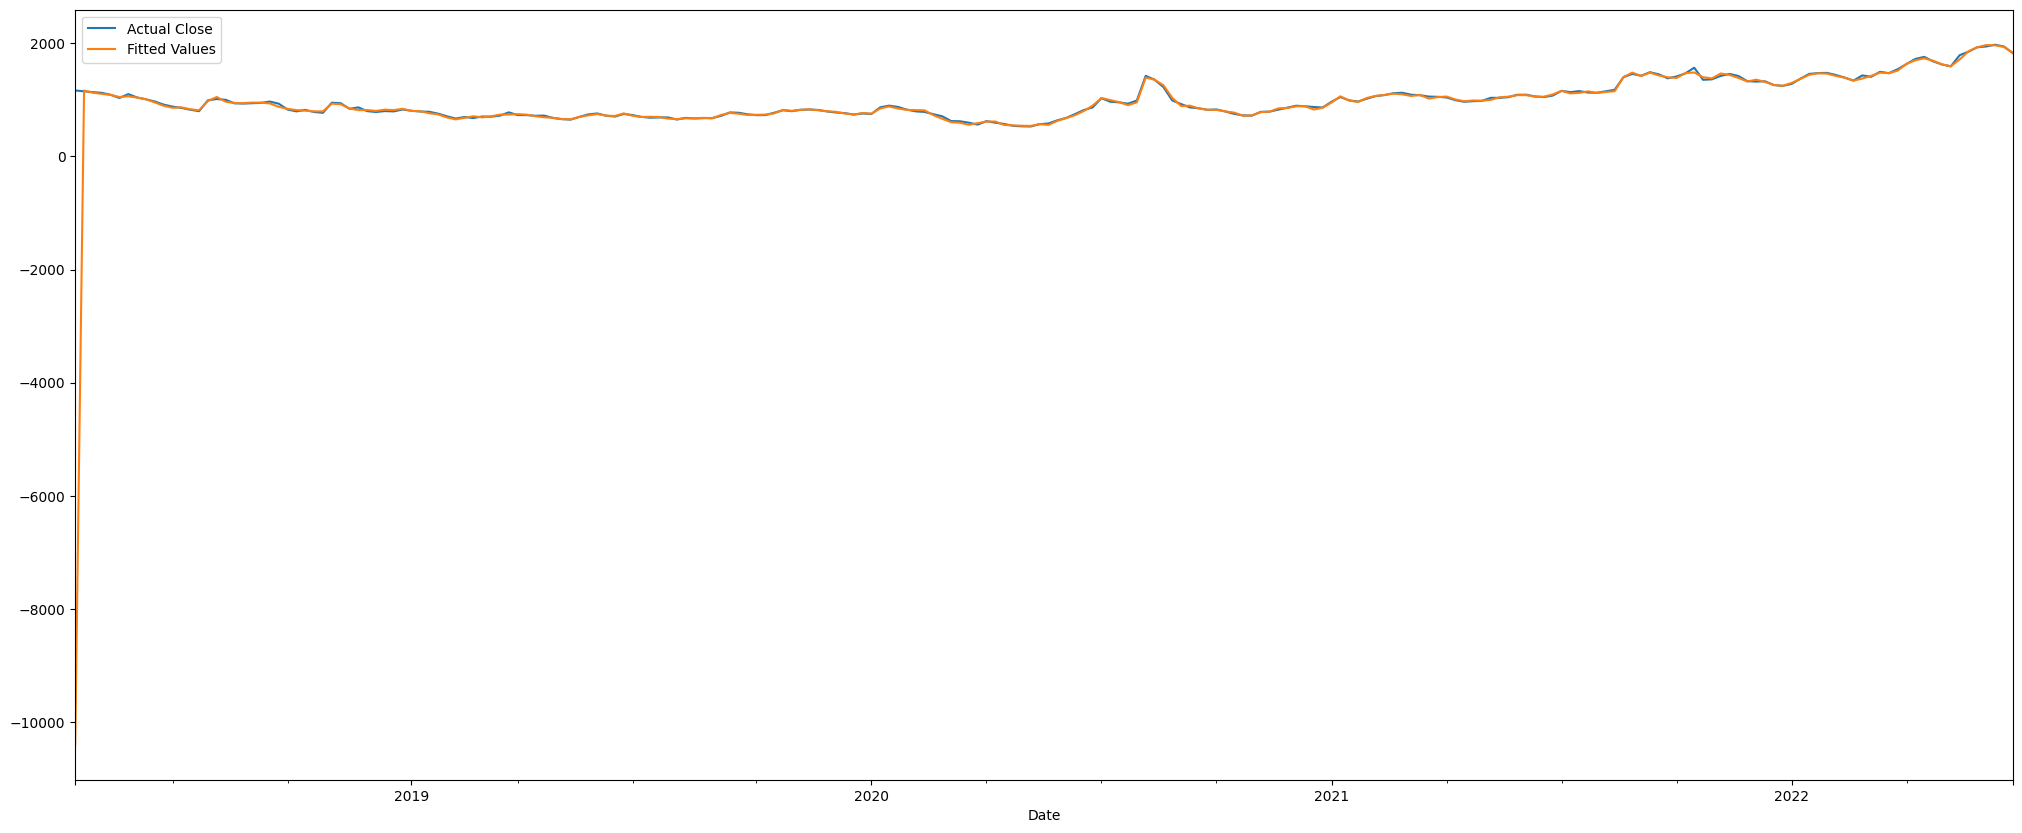

NameError: name 'predictions' is not defined

In [16]:
# # Prepare the data
# dates = pd.to_datetime(dftrain['hal_High'])
# values = dftrain['hal_High']
# series = pd.Series(values.values, index=dates)

import statsmodels.api as sm

endog = dftrain['hal_High']
exog = sm.add_constant(dftrain[['hal_Open', 'hal_Low', 'hal_Close', 'hal_Adj Close',
       'hal_Volume', 'Month', 'Year', 'rolling_mean_hal_Open',
       'rolling_std_hal_Open', 'diff_hal_Open', 'ewm_hal_Open',
       'variance_hal_Open', 'rolling_mean_Volume', 'VSI',
       'rolling_mean_hal_Close', 'rolling_std_hal_Close', 'diff_hal_Close',
       'ewm_hal_Close', 'variance_hal_Close', 'rolling_mean_hal_Adj Close',
       'rolling_std_hal_Adj Close', 'diff_hal_Adj Close', 'ewm_hal_Adj Close',
       'variance_hal_Adj Close']])

# Fit the ARIMA model
order = (0, 1, 1)
model = ARIMA(endog=endog, exog=exog , order=order)
model_fit = model.fit()


print(model_fit.summary())
# predictions = model_fit.predict()

dftrain['hal_High'].plot(figsize=(25,10), label='Actual Close')
model_fit.fittedvalues.plot(label='Fitted Values')
plt.legend()
plt.show()

# dftrain['hal_High'].plot(figsize=(20,6))
# model_fit.fittedvalues.plot()
# plt.show()

#train
# dftrain['hal_High'] = dftrain['hal_High'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftrain['hal_High'], predictions)
print("MAE:", MAE)
mape = mape(dftrain['hal_High'],predictions) * 100
print("MAPE:",mape)


smape = np.mean(np.abs(model_fit.fittedvalues - dftrain['hal_High']) / (np.abs(model_fit.fittedvalues) + np.abs(dftrain['hal_High'])))
print(smape)

# plt.figure(figsize=(20,6))
# plt.plot(dftrain['hal_High'], label='Actual',linewidth=2)
# plt.plot(predictions, label='Predicted',linewidth=2)

# plt.xlabel('Trend')
# plt.ylabel('Value')
# plt.title('ARIMA Model')
# plt.legend()
# plt.show()


In [111]:
print(model_fit.fittedvalues)

Date
2018-04-23    30270.630229
2018-04-30     1131.777025
2018-05-07     1105.815360
2018-05-14     1092.149930
2018-05-21     1054.640555
                  ...     
2022-05-30     1937.156056
2022-06-06     1953.397888
2022-06-13     1965.939304
2022-06-20     1939.275082
2022-06-27     1830.917935
Length: 219, dtype: float64


In [114]:
print(np.sqrt(mean_squared_error(model_fit.fittedvalues, dftrain['hal_High'])))

1967.961645629953


In [113]:
print(dftrain['hal_High'])

Date
2018-04-23    1149.000000
2018-04-30    1134.400024
2018-05-07    1122.050049
2018-05-14    1087.949951
2018-05-21    1031.949951
                 ...     
2022-05-30    1928.699951
2022-06-06    1941.550049
2022-06-13    1972.550049
2022-06-20    1941.000000
2022-06-27    1824.750000
Name: hal_High, Length: 219, dtype: float64


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5433      0.027    -19.936      0.000      -0.597      -0.490
sigma2      2.861e+04   1863.678     15.350      0.000     2.5e+04    3.23e+04
MAE: 112.12641828370181
MAPE: 10.542383053842698


c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tanis\AppData\Local\Temp\ipykernel_26812\1804845842.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

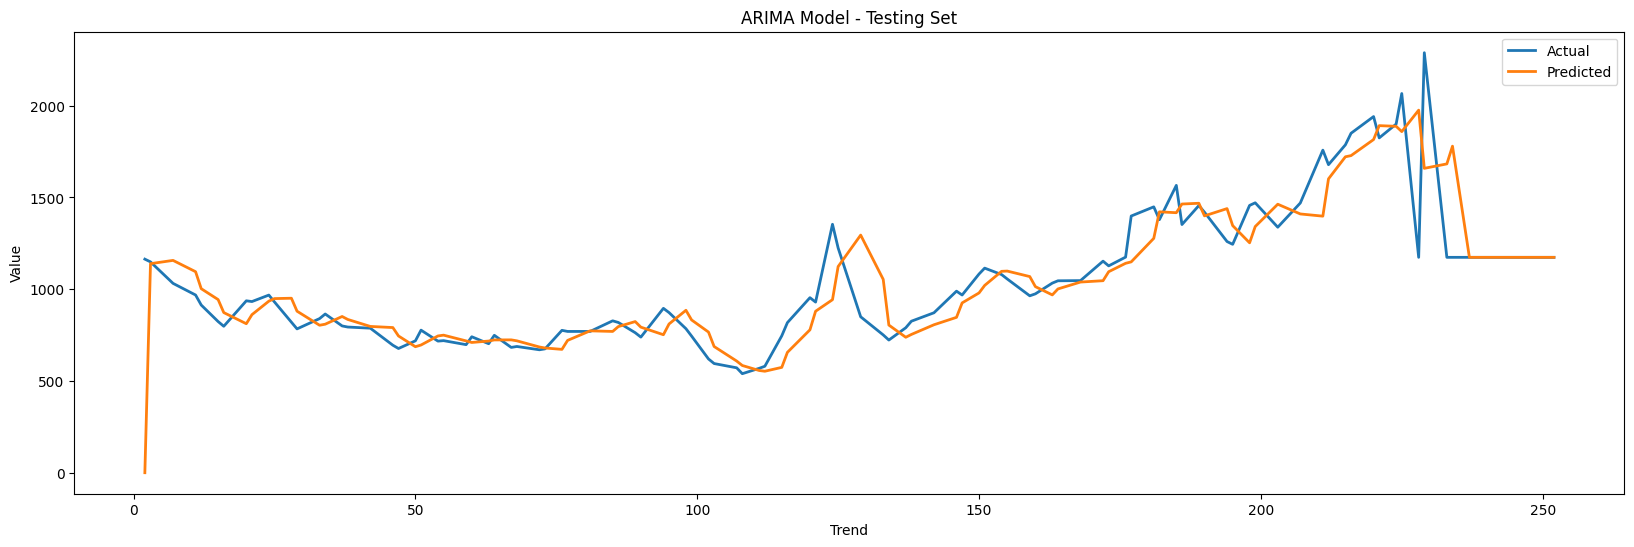

In [ ]:
# Prepare the data
dates = pd.to_datetime(dftest['hal_High'])
values = dftest['hal_High']
series = pd.Series(values.values, index=dates)

# Fit the ARIMA model
order = (1, 1, 0)
model = ARIMA(dftest['hal_High'], order=order)
model_fit = model.fit()

# Print only the ARIMA part of the summary
print(model_fit.summary().tables[1])

# Rest of your code
predictions = model_fit.predict()

# Convert the 'hal_High' column in the testing data to float
dftest['hal_High'] = dftest['hal_High'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE = mae(dftest['hal_High'], predictions)
print("MAE:", MAE)

mape_value = mape(dftest['hal_High'], predictions) * 100
print("MAPE:", mape_value)

plt.figure(figsize=(20, 6))
plt.plot(dftest['hal_High'], label='Actual', linewidth=2)
plt.plot(predictions, label='Predicted', linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model - Testing Set')
plt.legend()
plt.show()